# Movie Reviews Sentiment Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
%matplotlib inline


### Importing & Inspecting Data

In [2]:
data = pd.read_csv('datasets/imdb.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##### So there are no null values

### Exploring Data

In [4]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

##### 50% postive & 50% negative, so it's highly balanced data

<AxesSubplot:xlabel='sentiment', ylabel='count'>

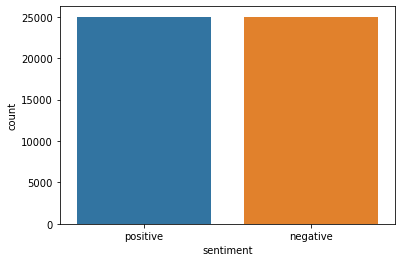

In [5]:
sns.countplot(x=data['sentiment'])

### Data Preprocessing & NLTK Text Data Cleaning

In [6]:
# Label encode sentiment to 1(positive) and 0(negative)
data['sentiment'].replace('positive',1,inplace=True)
data['sentiment'].replace('negative',0,inplace=True)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [7]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

##### review contains HTML tags, special characters, upercases and stopwords

#### Steps to clean the reviews :
- Remove HTML tags
- Remove special characters
- Convert everything to lowercase
- Remove stopwords
- Stemming

In [8]:
# Remove HTML tags
#s = data['review'][0]
#s


In [9]:
#s = re.sub('<.*?>','',s)  # removing HTML tags
#s = re.sub('[^a-zA-Z0-9]',' ',s) # removing special characters
#s = s.lower() #converting everthings to lower
#s = s.split()
#s

In [10]:
#nltk.download('stopwords')

In [11]:
ss = SnowballStemmer('english')

In [12]:
def text_clean(text):
    text = re.sub('<.*?>','',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    return text

def text_lower(text):
    return text.lower()

def text_remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [word for word in words if word not in stop_words]

def text_stem(text):
    ss = SnowballStemmer('english')
    
    return " ".join([ss.stem(w) for w in text])
    
    


In [13]:
#data= data.iloc[:100,:]
#data.head()

In [14]:
#text= text_clean(data['review'][0])
#text= text_lower(text)
#text= text_split(text)
#text= text_remove_stopwords(text)
#text= text_stem(text)
#text

In [15]:
data.review = data.review.apply(text_clean)

In [16]:
data.review = data.review.apply(text_lower)
data.review

0        one of the other reviewers has mentioned that ...
1        a wonderful little production  the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s  love in the time of money  is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot  bad dialogue  bad acting  idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
data.review = data.review.apply(text_remove_stopwords)

In [18]:
data.review = data.review.apply(text_stem)

In [19]:
data.review

0        one review mention watch oz episod hook right ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previous comment side maltin one se...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [20]:
cv = CountVectorizer()
X = cv.fit_transform(data.review)
X

<50000x70131 sparse matrix of type '<class 'numpy.int64'>'
	with 4638995 stored elements in Compressed Sparse Row format>

In [21]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
y = data['sentiment']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Training & Building

In [24]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

### Model Prediction

In [25]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [26]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
27615    1
21964    1
33321    1
40225    1
28203    0
Name: sentiment, Length: 16500, dtype: int64

### Model Evaluation

In [27]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7130 1078]
 [1375 6917]]
0.8513333333333334
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      8208
           1       0.87      0.83      0.85      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



### Model Deployement & Production

In [28]:
pickle.dump(clf,open('model.pkl','wb'))